In [1]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')


In [3]:
# import os
# data_folder = '/content/drive/My Drive/steeldefect/'
# os.chdir(data_folder)


In [4]:
# os.listdir(data_folder)


In [5]:
import pandas as pd

train_images_dir = R"C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images"
# test_images_dir = r"C:\Users\Hp\Downloads\severstal-steel-defect-detection\test_images"
csv_file = R"C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train.csv.csv"

# Load the CSV file containing image filenames and defect annotations
data = pd.read_csv(csv_file)

In [6]:
data

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import keras
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import cv2
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

In [8]:
data

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


In [9]:
data

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...
...,...,...,...
7090,ffcf72ecf.jpg,3,121911 34 122167 101 122422 169 122678 203 122...
7091,fff02e9c5.jpg,3,207523 3 207777 9 208030 15 208283 22 208537 2...
7092,fffe98443.jpg,3,105929 5 106177 14 106424 24 106672 33 106923 ...
7093,ffff4eaa8.jpg,3,16899 7 17155 20 17411 34 17667 47 17923 60 18...


In [10]:
data.shape

(7095, 3)

ClassId
3    5150
1     897
4     801
2     247
Name: count, dtype: int64

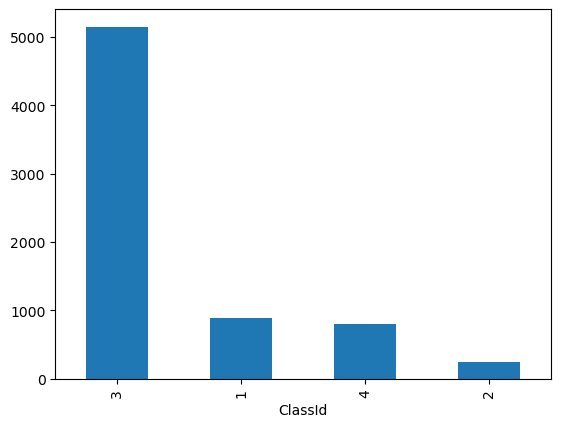

In [11]:
data["ClassId"].value_counts().plot(kind = 'bar')
data["ClassId"].value_counts()

ClassID 3 has the maximum count among other classid's.

In [12]:

        
# import os
# import cv2
# from tqdm import tqdm

# l1 = []
# l2 = []



# for img, ClassId, EncodedPixels in tqdm(data.values):
#     # Correctly construct the file path
#     image_path = os.path.join(train_images_dir, img)
#     image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    
#     # Ensure the image was loaded
#     if image is not None:
#         image = cv2.resize(image, (120, 120))
#         l1.append(image)
#         l2.append(ClassId)
#     else:
#         print(f"Image not found at path: {image_path}")        

**Checking Random Steel images to check whether it is defected or not**

In [13]:
# i = 16
# plt.imshow(l1[i])

In [14]:
# i = 90
# plt.imshow(l1[i])

**Label encoding the input features and one hot encoding the target feature.**

In [15]:
# encoder = LabelEncoder()

# X= np.array(l1)
# X = X/255

# y = encoder.fit_transform(l2)
# y = np.array(y)

In [16]:
# X.shape

In [17]:
# y.shape

In [18]:
# from imblearn.over_sampling import RandomOverSampler
# reshaped_X = X.reshape(X.shape[0],-1)
# oversample = RandomOverSampler(sampling_strategy='not majority')
# X, y  = oversample.fit_resample(reshaped_X , y)
# X = X.reshape(-1,120,120,3)

In [19]:
import cv2
import numpy as np

def preprocess_image(image_path, target_size=(120, 120), normalize=True):
    """
    Preprocesses an image: loads, resizes, and normalizes it.

    Parameters:
    - image_path (str): Path to the image file.
    - target_size (tuple): Desired size of the output image (width, height).
    - normalize (bool): Whether to normalize pixel values.

    Returns:
    - Preprocessed image as a numpy array.
    """
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    # Check if the image was successfully loaded
    if image is not None:
        # Resize the image
        image = cv2.resize(image, target_size)

        # Normalize the image
        if normalize:
            image = image / 255.0

        return image
    else:
        return None


In [20]:
from tqdm import tqdm
import os
l1 = []  # List to store preprocessed images
l2 = []  # List to store corresponding labels

for img, ClassId, _ in tqdm(data.values):
    # Preprocess the image
    image_path = os.path.join(train_images_dir, img)
    processed_image = preprocess_image(image_path)

    if processed_image is not None:
        l1.append(processed_image)
        l2.append(ClassId)
    else:
        print(f"Image not found at path: {image_path}")

# Convert lists to numpy arrays and perform any additional processing (like encoding labels)
X = np.array(l1)
y = np.array(l2)  # Perform label encoding if necessary


  0%|▎                                                                              | 27/7095 [00:00<00:51, 136.17it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\000a4bcdd.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\000f6bf48.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\0030401a5.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\0046839bd.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\008621629.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\0088260da.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

  1%|▊                                                                              | 71/7095 [00:00<00:54, 127.78it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\01661826d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\01919944c.jpg


  1%|▉                                                                              | 85/7095 [00:00<00:54, 127.65it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\02431211b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\026183d85.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\031627893.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\03461f8e0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\034941f9d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\035021da2.jpg


  2%|█▏                                                                            | 113/7095 [00:00<00:53, 129.32it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\03860f6a9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\039577d49.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\04055fd3e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\04072b39a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\041187764.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\04246167f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

  2%|█▋                                                                            | 156/7095 [00:01<00:52, 132.19it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\05184e71b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\052838084.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\05396b495.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\054190eb2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\05747b10b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\059000a4f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

  3%|██                                                                            | 184/7095 [00:01<00:54, 126.92it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\06713b712.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\068587112.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\07732248e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\07732248e.jpg


  3%|██▎                                                                           | 213/7095 [00:01<00:51, 132.88it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\079054aa2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\08193cfc8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\0841074c1.jpg


  3%|██▋                                                                           | 242/7095 [00:01<00:55, 124.12it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\0858830b6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\08605c0eb.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\08808b1a2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\08852b69d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\09140dda7.jpg


  4%|██▉                                                                           | 270/7095 [00:02<00:52, 128.96it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\092145f0c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\092614afe.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\09323504a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\09552b326.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\096465b41.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\0970201e2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

  5%|███▌                                                                          | 321/7095 [00:02<00:44, 150.96it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\0a21ce787.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\0a26aceb2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\0a37f0a29.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\0a405b396.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\0a4ad45a5.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\0a5cff3a7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

  5%|███▋                                                                          | 337/7095 [00:02<00:44, 152.23it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\0b8775632.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\0bb304645.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\0bb37f2aa.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\0bb39cafa.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\0bbd121d7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\0bc0d715e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

  7%|█████▏                                                                        | 469/7095 [00:03<00:47, 138.07it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\101648543.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\101648543.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\10378f8ea.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\1086196e1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\10909b4bb.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\10972add9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

  7%|█████▍                                                                        | 499/7095 [00:03<00:46, 142.62it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\1165781f0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\117759a83.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\12234aab8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\12274ea9c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\12375dd7a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\1238340e9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

  7%|█████▊                                                                        | 529/7095 [00:03<00:48, 136.51it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\13067c801.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\13169e4cf.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\132511b8b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\1387583da.jpg


  8%|██████▎                                                                       | 571/7095 [00:04<00:48, 133.47it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\14457e888.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\15547c309.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\15796b4d5.jpg


  8%|██████▌                                                                       | 599/7095 [00:04<00:48, 132.71it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\163473240.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\16371ae14.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\16498a156.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\166645a0b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\166818755.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\1699951da.jpg


  9%|███████                                                                       | 641/7095 [00:04<00:49, 130.20it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\17383bd97.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\178490b45.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\1795867f2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\180478e66.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\181454b94.jpg


  9%|███████▎                                                                      | 670/7095 [00:05<00:48, 132.83it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\183383e8d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\18615eacf.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\186534efc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\189659389.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\1897882a1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\190190a6f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 10%|███████▋                                                                      | 698/7095 [00:05<00:51, 124.56it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\19656c148.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\198252b95.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\19955420c.jpg


 13%|█████████▉                                                                    | 908/7095 [00:06<00:43, 142.32it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\200992bc9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\201560907.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\2019417e0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\202838a14.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\204949166.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\205360569.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 13%|██████████▎                                                                   | 937/7095 [00:07<00:44, 137.33it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\21365e1a3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\214465021.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\219621d5d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\22031aa8f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\22123f29f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\22458f946.jpg


 14%|██████████▌                                                                   | 965/7095 [00:07<00:45, 135.72it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\22553cebc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\22827c51d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\229500455.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\229906ed1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\23115ad3a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\23120f506.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 14%|██████████▉                                                                  | 1008/7095 [00:07<00:44, 136.71it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\24066d57e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\24154161c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\24256f234.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\242894fc4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\24528b550.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\247108a1c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 15%|███████████▍                                                                 | 1051/7095 [00:07<00:45, 132.68it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\250107a1b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\2527831fa.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\25337cb38.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\25515c2f6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\25548e840.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\25737d300.jpg


 15%|███████████▋                                                                 | 1080/7095 [00:08<00:43, 137.68it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\26272c2a7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\268446e17.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\271551c4f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\2720732e7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\27207fb2e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\2725ee8d6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 16%|████████████                                                                 | 1111/7095 [00:08<00:42, 141.74it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\276111a31.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\2770fe933.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\2776642e1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\2789df930.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\28241874f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\282425786.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 16%|████████████▌                                                                | 1157/7095 [00:08<00:41, 143.32it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\29124169b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\2912df978.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\2912e9e24.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\2929284cc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\2930b4f52.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\2930b4f52.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 19%|██████████████▌                                                              | 1341/7095 [00:10<00:42, 134.15it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\30070d59d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3012f44e9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\301601620.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\30171214c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3035a46b7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\304083ca3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 19%|██████████████▊                                                              | 1370/7095 [00:10<00:41, 136.54it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3116edfe6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\312224509.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3124b1e5c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\31262e8f9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\31433d3b4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\315405789.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 20%|███████████████▏                                                             | 1398/7095 [00:10<00:44, 128.89it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3221a0d79.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\32578d3e5.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3266ff34d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3294c9bd1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3294c9bd1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\33226811d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 20%|███████████████▍                                                             | 1428/7095 [00:10<00:42, 134.74it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3377332c0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3385f9e14.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\33945043e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3405695b6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3412f557e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\34349ea9e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 21%|███████████████▊                                                             | 1458/7095 [00:10<00:40, 139.55it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3505dd9f3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\351569b6a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\351936382.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\352063998.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3520eaa6d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\35248a277.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 21%|████████████████▎                                                            | 1501/7095 [00:11<00:40, 138.03it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3672e84bc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\367553727.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\36789516a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3684a95a8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3688df8e4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\36979a804.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 21%|████████████████▍                                                            | 1515/7095 [00:11<00:42, 132.06it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\37782387c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3846a8c0c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3856224a4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3860f3d39.jpg


 22%|████████████████▋                                                            | 1543/7095 [00:11<00:43, 127.58it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\38698fd76.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\38760254d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3888ec2cd.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3932751f1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\3933a5fcc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\395381ac8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 22%|█████████████████▏                                                           | 1585/7095 [00:11<00:43, 126.45it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\39960c9e9.jpg


 25%|███████████████████                                                          | 1755/7095 [00:13<00:38, 138.84it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\400144782.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\400161088.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\4014c79d3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\4014d6f31.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\401614c72.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\4029fea8e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 25%|███████████████████▏                                                         | 1771/7095 [00:13<00:37, 143.88it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\410194f0a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\410194f0a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\41028db98.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\411377ca3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\41333f13c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\41411378e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 25%|███████████████████▌                                                         | 1803/7095 [00:13<00:36, 146.17it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\42087f902.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\4216b133c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\42353cc21.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\4243c7476.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\42527400c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\42527400c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 26%|███████████████████▉                                                         | 1833/7095 [00:13<00:36, 142.45it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\4340e1e42.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\4345c2b85.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\4345db2fc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\4353697d9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\4355ef39b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\436398e3b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 26%|████████████████████▏                                                        | 1863/7095 [00:13<00:38, 136.77it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\4422bc417.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\44415ab00.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\4448b4286.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\44668f045.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\447038bc8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\4499aaa80.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 27%|████████████████████▋                                                        | 1906/7095 [00:14<00:37, 138.60it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\455241741.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\45612bd46.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\45740ac20.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\459617182.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\459790d82.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\459840244.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 27%|█████████████████████                                                        | 1936/7095 [00:14<00:36, 140.02it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\463108c67.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\464917fe0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\464987349.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\465808594.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\46582cff8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\46655e050.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 27%|█████████████████████▏                                                       | 1951/7095 [00:14<00:38, 134.77it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\4784189ec.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\4787645e5.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\4803fc0ae.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\484439824.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\48532e006.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\4854add54.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 28%|█████████████████████▍                                                       | 1981/7095 [00:14<00:36, 140.87it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\48626da29.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\4874f19dd.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\48831ab9e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\488922ac2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\4932f1a80.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\4941491de.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 31%|███████████████████████▋                                                     | 2184/7095 [00:16<00:39, 125.27it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5013e5c9d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5020df2f8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5041c4a3f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5064ecb6d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\50655a748.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\506826fc6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 31%|████████████████████████                                                     | 2214/7095 [00:16<00:36, 132.62it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\51632c4a4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5188851b2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\51938ecf0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\519599df3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5210ac609.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\52122168a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 32%|████████████████████████▎                                                    | 2243/7095 [00:16<00:35, 137.74it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\528112571.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5283b3138.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5303447ca.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5335b8fd7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\533926801.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\534666b46.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 32%|████████████████████████▋                                                    | 2274/7095 [00:17<00:33, 144.10it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\542084ea9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5432ff65a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\54439ae68.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5457e4e20.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5462db9cd.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5462fa711.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 33%|█████████████████████████▏                                                   | 2317/7095 [00:17<00:36, 130.59it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\55042415c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\55136d7f3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\55303df62.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5545e4b0f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5545e4b0f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\554710095.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 33%|█████████████████████████▍                                                   | 2346/7095 [00:17<00:36, 130.85it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\56120829d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5613bb745.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\562055ee9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\56553f422.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5660432cc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5665ada1b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 33%|█████████████████████████▋                                                   | 2362/7095 [00:17<00:34, 138.44it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5727d7f96.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\57314986d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5757100f0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\576910e29.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\576910e29.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\57794735f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 34%|█████████████████████████▉                                                   | 2390/7095 [00:17<00:34, 136.17it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5848791de.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5852e61b5.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\585904c94.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\58673aa89.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5891749fb.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\5892d9332.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 37%|████████████████████████████▎                                                | 2612/7095 [00:19<00:35, 127.79it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\602288d9c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6023f98ef.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6057916d4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\607105dac.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6078cc0b1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6081f6677.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 37%|████████████████████████████▍                                                | 2626/7095 [00:19<00:34, 128.99it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6143631ab.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\61457b567.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6149dc4ee.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6149dc4ee.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\616646b4d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6181b0a92.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 38%|████████████████████████████▉                                                | 2668/7095 [00:20<00:33, 132.06it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\620100d93.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\620568126.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6209acbc4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\62122709f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6212e44a0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6218cd94a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 38%|█████████████████████████████▎                                               | 2698/7095 [00:20<00:31, 138.25it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6308e03ad.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\631774933.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6320ec8c6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\632133372.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6336c7ef4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\633701ae3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 38%|█████████████████████████████▌                                               | 2727/7095 [00:20<00:32, 135.35it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6406c1e6f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\64261b3f7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6430ea237.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6430ea237.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\64361cd8b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\64443519b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 39%|█████████████████████████████▉                                               | 2756/7095 [00:20<00:32, 134.21it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\653655d53.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\65657b8ed.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\65688fbc2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\65841b207.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6588cf973.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\65903909a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 39%|██████████████████████████████▍                                              | 2802/7095 [00:21<00:30, 142.71it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6705eb964.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6714ba056.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6745075b9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6753759e0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\67558ad53.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\67579f49a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 40%|██████████████████████████████▋                                              | 2833/7095 [00:21<00:28, 148.33it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6812ce51c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\68142cad1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\68150e7ff.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\682271cbc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6825de090.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6826c7bde.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 40%|███████████████████████████████                                              | 2864/7095 [00:21<00:28, 147.69it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\691680efc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\6916a083e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\69205724f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\69231176e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\69231176e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\69365fabd.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 43%|█████████████████████████████████▍                                           | 3077/7095 [00:23<00:28, 142.77it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\700209a95.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7025a90c1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\70279ce5b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\703421ef2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7039151ef.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7045c2a55.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 44%|█████████████████████████████████▋                                           | 3108/7095 [00:23<00:27, 142.45it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\714256911.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\714256911.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7149874c8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7150719e7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\71553a0d8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\71553a0d8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 44%|██████████████████████████████████                                           | 3138/7095 [00:23<00:28, 138.39it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7202e52d8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7210ffc2d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7220aba6c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7232c2ceb.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7242fe32c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7242fe32c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 45%|██████████████████████████████████▎                                          | 3166/7095 [00:23<00:30, 129.66it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7329b8668.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\73303e8a0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\73472d296.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7365300fe.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7378f1d94.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\738850f07.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 45%|██████████████████████████████████▋                                          | 3197/7095 [00:24<00:28, 137.60it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7404322b0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\74048991c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7410d4361.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\741265573.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\74131d9ff.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7420f27c9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 45%|███████████████████████████████████                                          | 3226/7095 [00:24<00:28, 135.31it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\75070e973.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\75361926d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7549c90b1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\756390c3a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\757577d91.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\75778a6a1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 46%|███████████████████████████████████▎                                         | 3257/7095 [00:24<00:27, 138.92it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7604be5f3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\76094e200.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\76096b17b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7612f0d6c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\76165cccc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7620c36fb.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 47%|███████████████████████████████████▊                                         | 3302/7095 [00:24<00:27, 139.86it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\77064b126.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\77343ffda.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\773948ca6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7740cc61d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\774400958.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7749df027.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 47%|███████████████████████████████████▉                                         | 3317/7095 [00:24<00:26, 140.45it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\786980ab9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\7880bcef5.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\78832879c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\792266a85.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\79307aa18.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\794307d65.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 50%|██████████████████████████████████████▏                                      | 3524/7095 [00:26<00:25, 140.43it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\8016e642c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\801887861.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\8066b7589.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\8066b7589.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\8071db7b3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\80841e418.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 50%|██████████████████████████████████████▌                                      | 3554/7095 [00:26<00:26, 135.83it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\81770ddda.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\8177945a9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\81847fd11.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\81891e821.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\82168bba3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\823994b16.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 51%|██████████████████████████████████████▉                                      | 3585/7095 [00:26<00:25, 138.82it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\82602cb06.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\8266cca81.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\8299f5460.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\8299f5460.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\8313b4e90.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\83298d267.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 51%|███████████████████████████████████████▎                                     | 3617/7095 [00:27<00:24, 144.02it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\837645cf1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\838135ec4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\838135ec4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\8399a4300.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\8417eb22d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\84232105a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 51%|███████████████████████████████████████▌                                     | 3647/7095 [00:27<00:25, 137.14it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\846788254.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\8478415cf.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\8484468e0.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\84865746c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\84865746c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\848713301.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 52%|███████████████████████████████████████▉                                     | 3675/7095 [00:27<00:25, 131.80it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\8527d0b55.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\8527d0b55.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\85294cff9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\85294cff9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\8540353ea.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\8562a95b4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 52%|████████████████████████████████████████▏                                    | 3707/7095 [00:27<00:24, 136.55it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\86654180d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\86752d23a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\86756300d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\867572f1e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\8677c19e6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\868759698.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 53%|████████████████████████████████████████▌                                    | 3735/7095 [00:27<00:25, 133.81it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\875612422.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\87754d760.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\87754d760.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\878824b35.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\8821b2e2c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\8827d2bd3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 53%|█████████████████████████████████████████                                    | 3781/7095 [00:28<00:24, 134.04it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\89087f994.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\89158744a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\89158744a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\891837278.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\892321605.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\892582cf9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 56%|███████████████████████████████████████████▎                                 | 3996/7095 [00:30<00:23, 133.22it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9019c0e1e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\90246e919.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9027291e8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9028ff68e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\904584541.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\904677cea.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 57%|███████████████████████████████████████████▌                                 | 4012/7095 [00:30<00:22, 137.26it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\91478a2fb.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9150a0950.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\91583d282.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9163ec76b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\91649dea7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\91696aaca.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 57%|███████████████████████████████████████████▊                                 | 4040/7095 [00:30<00:23, 132.32it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9270f72ac.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\927100ebb.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9271c7e3d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9278ab6ba.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\92932546c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\92932546c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 57%|████████████████████████████████████████████▏                                | 4069/7095 [00:30<00:22, 133.66it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\935654dc9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\93775b19c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9378a6f12.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9384459df.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\93851869f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\94050efd8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 58%|████████████████████████████████████████████▍                                | 4097/7095 [00:30<00:22, 131.94it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\946227d6c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\94625a99c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\946525536.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\94753d945.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\94882163b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\94947e1f9.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 58%|████████████████████████████████████████████▊                                | 4126/7095 [00:30<00:22, 134.30it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9570a27f4.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9574104d6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9586cb6e3.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9589d49ee.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\959218299.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9612cf3ee.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 59%|█████████████████████████████████████████████                                | 4155/7095 [00:31<00:21, 135.49it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9699f82fe.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\97047587f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\97192a78b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9725a81d1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9737361a7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\97419c683.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 59%|█████████████████████████████████████████████▌                               | 4198/7095 [00:31<00:21, 136.63it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\98017b765.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9804396ef.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9805e5d5d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\982193e49.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\982193e49.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9822aabfc.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 60%|█████████████████████████████████████████████▊                               | 4226/7095 [00:31<00:21, 136.32it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\99224c3d5.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9941cb9f1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9958480e2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\9962acd22.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\99743b154.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\99855ae32.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 62%|███████████████████████████████████████████████▊                             | 4409/7095 [00:33<00:20, 132.58it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a0058b3fe.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a01bc9da8.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a01c8ce20.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a025c6ed2.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a02fe46b6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a045e21e6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 62%|████████████████████████████████████████████████                             | 4424/7095 [00:33<00:19, 136.54it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a0fcb1803.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a10a35f4f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a10c18895.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a10fb7849.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a13c52c08.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a14e96726.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 63%|████████████████████████████████████████████████▌                            | 4470/7095 [00:33<00:18, 143.83it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a1c385029.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a1d0b7617.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a1d5d669f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a1dba4777.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a1f41023e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a1f5481df.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 63%|████████████████████████████████████████████████▋                            | 4485/7095 [00:33<00:18, 141.99it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a31bad68b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a32f079ad.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a33b2c662.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a33b2c662.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a33d86440.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a33ec265a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 64%|█████████████████████████████████████████████████                            | 4515/7095 [00:34<00:18, 137.82it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a44dd8116.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a49cff42b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a49edb718.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a4a648cf6.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a4c93ac65.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a4cef60d1.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 64%|█████████████████████████████████████████████████▎                           | 4544/7095 [00:34<00:18, 138.59it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a51bf62f7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a52f36666.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a56c8f958.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a56c8f958.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a56d4b7be.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a56df9123.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 64%|█████████████████████████████████████████████████▋                           | 4576/7095 [00:34<00:18, 133.43it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a61ce7b8a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a6a6f59c7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a6aceec2e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a6aceec2e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a6af7373c.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a6b00abd7.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 65%|█████████████████████████████████████████████████▉                           | 4607/7095 [00:34<00:18, 136.24it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a6ecee828.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a6fcd0f71.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a7c57d74f.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a7d470272.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a7d5ae972.jpg


 65%|██████████████████████████████████████████████████▎                          | 4635/7095 [00:34<00:18, 132.99it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a7e675896.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a7e79695b.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a8b77ce4d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a8ba23b0a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a8ba23b0a.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a8bc0275d.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

 66%|██████████████████████████████████████████████████▊                          | 4681/7095 [00:35<00:17, 140.21it/s]

Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a9a045b71.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a9a5ac063.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a9b1abf48.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a9b327adb.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a9b4c5d52.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\train_images\a9c5e9f1e.jpg
Image not found at path: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-d

100%|█████████████████████████████████████████████████████████████████████████████| 7095/7095 [00:55<00:00, 127.74it/s]


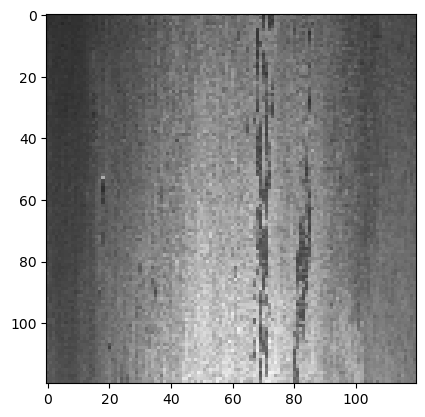

In [21]:
i = 15
plt.imshow(l1[i])

In [22]:
X.shape

(5915, 120, 120, 3)

In [23]:
y = to_categorical(y)

In [24]:
y

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

Splitting the data into 80% train set and 20% test set

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True)

In [26]:

print("x_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (4732, 120, 120, 3)
x_test shape: (1183, 120, 120, 3)
y_train shape: (4732, 5)
y_test shape: (1183, 5)


Building the CNN Model

In [27]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(256,activation="relu"))
model.add(Dense(5,activation="softmax"))

Compiling the model

In [28]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=["accuracy"])

In [29]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [30]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow(X_train, y_train, batch_size=128)

# Use the generator with model.fit
history = model.fit(train_generator, epochs=30, validation_data=(X_test, y_test), verbose=1)






Epoch 1/30


37/37 [==============================] - 23s 559ms/step - loss: 0.9853 - accuracy: 0.7039 - val_loss: 0.8611 - val_accuracy: 0.7244
Epoch 2/30
37/37 [==============================] - 21s 573ms/step - loss: 0.8178 - accuracy: 0.7246 - val_loss: 0.7868 - val_accuracy: 0.7278
Epoch 3/30
37/37 [==============================] - 20s 541ms/step - loss: 0.7766 - accuracy: 0.7401 - val_loss: 0.7465 - val_accuracy: 0.7388
Epoch 4/30
37/37 [==============================] - 19s 523ms/step - loss: 0.7356 - accuracy: 0.7434 - val_loss: 0.7119 - val_accuracy: 0.7473
Epoch 5/30
37/37 [==============================] - 21s 573ms/step - loss: 0.7173 - accuracy: 0.7492 - val_loss: 0.6992 - val_accuracy: 0.7464
Epoch 6/30
37/37 [==============================] - 20s 538ms/step - loss: 0.7031 - accuracy: 0.7523 - val_loss: 0.6893 - val_accuracy: 0.7422
Epoch 7/30
37/37 [==============================] - 20s 537ms/step - loss: 0.6925 - accuracy: 0.7511 - val_loss: 0.6588 - val_accuracy: 0.74

In [31]:
# from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
# import cv2
# import numpy as np
# import os

# model = ResNet50(weights='imagenet', include_top=False)
# def preprocess_image_for_model(image_path, target_size=(224, 224)):
#     img = preprocess_image(image_path, target_size=target_size, normalize=False)
#     if img is not None:
#         img = np.expand_dims(img, axis=0)
#         img = preprocess_input(img)  # Specific to ResNet50
#         return img
#     return None
# def extract_features(image_path, model):
#     preprocessed_img = preprocess_image_for_model(image_path)
#     if preprocessed_img is not None:
#         features = model.predict(preprocessed_img)
#         return features
#     else:
#         return None
# image_path = 'path_to_your_image.jpg'  # Replace with your image path
# features = extract_features(image_path, model)

# if features is not None:
#     print("Extracted features:", features)
# else:
#     print("Image could not be processed.")


Fitting the model

In [32]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),batch_size=128,
                    verbose=1)

Epoch 1/30
37/37 [==============================] - 21s 568ms/step - loss: 0.3771 - accuracy: 0.8254 - val_loss: 0.5842 - val_accuracy: 0.7650
Epoch 2/30
37/37 [==============================] - 19s 514ms/step - loss: 0.3764 - accuracy: 0.8273 - val_loss: 0.5892 - val_accuracy: 0.7540
Epoch 3/30
37/37 [==============================] - 18s 490ms/step - loss: 0.3821 - accuracy: 0.8299 - val_loss: 0.6138 - val_accuracy: 0.7667
Epoch 4/30
37/37 [==============================] - 21s 565ms/step - loss: 0.3683 - accuracy: 0.8273 - val_loss: 0.5973 - val_accuracy: 0.7540
Epoch 5/30
37/37 [==============================] - 19s 516ms/step - loss: 0.3530 - accuracy: 0.8373 - val_loss: 0.6007 - val_accuracy: 0.7608
Epoch 6/30
37/37 [==============================] - 19s 528ms/step - loss: 0.3519 - accuracy: 0.8392 - val_loss: 0.6333 - val_accuracy: 0.7608
Epoch 7/30
37/37 [==============================] - 20s 535ms/step - loss: 0.3333 - accuracy: 0.8483 - val_loss: 0.5999 - val_accuracy: 0.7532

<Axes: title={'center': 'Loss curve'}>

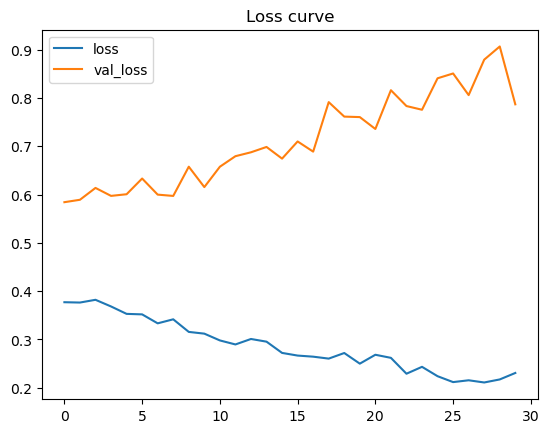

In [33]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

<Axes: title={'center': 'Accuracy curve'}>

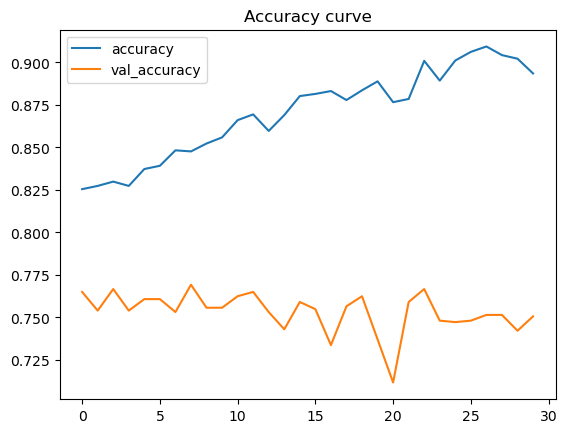

In [34]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

In [35]:
result = model.evaluate(X_test, y_test)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

37/37 [==============================] - 2s 39ms/step - loss: 0.7869 - accuracy: 0.7506
[+] Accuracy: 75.06%


In [36]:
from keras.models import Model
model.save('my_model.h5')

C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
from keras.models import load_model

loaded_model = load_model('my_model.h5')

In [38]:
# import cv2
# import numpy as np

# def preprocess_image(image_path, target_size=(120, 120), normalize=True):
#     """
#     Preprocesses an image: loads, resizes, and normalizes it.

#     Parameters:
#     - image_path (str): Path to the image file.
#     - target_size (tuple): Desired size of the output image (width, height).
#     - normalize (bool): Whether to normalize pixel values.

#     Returns:
#     - Preprocessed image as a numpy array.
#     """
#     # Load the image
#     image = cv2.imread(image_path, cv2.IMREAD_COLOR)

#     # Check if the image was successfully loaded
#     if image is not None:
#         # Resize the image
#         image = cv2.resize(image, target_size)

#         # Normalize the image
#         if normalize:
#             image = image / 255.0

#         return image
#     else:
#         return None


In [39]:
test_images_dir = R"C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\test_images"  # Verify this path
print("Test images directory:", test_images_dir)

Test images directory: C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\test_images


In [40]:
test_images_dir = R"C:\Users\Hp\OneDrive\Desktop\Machine Learning\Group assignment1\severstal-steel-defect-detection\test_images"# Adjust with the correct path
test_image_files = os.listdir(test_images_dir)

# Check if the list is empty
if not test_image_files:
    print("No files found in the directory.")
else:
    print(f"Found {len(test_image_files)} files.")

Found 5506 files.


In [ ]:
import numpy as np
import os

results = []

for file_name in test_image_files:
    # Preprocess the image
    img_path = os.path.join(test_images_dir, file_name)
    test_image = preprocess_image(img_path)

    # Check if the image is loaded
    if test_image is not None:
        # Add batch dimension
        test_image = np.expand_dims(test_image, axis=0)

        # Predict
        prediction = model.predict(test_image)
        predicted_class = np.argmax(prediction, axis=1)

        # Interpret the prediction
        class_names = {0: 'No Defect', 1: 'Defect Type 1', 2: 'Defect Type 2', 3: 'Defect Type 3', 4: 'Defect Type 4'}  # Adjust as per your classes
        result = f"{file_name}: {class_names[predicted_class[0]]}"
        results.append(result)
    else:
        print(f"Image not found at path: {img_path}")

# Display the results
for result in results:
    print(result)
